# ***Línea 144 - Grupo 2***
---
La Línea 144 brinda atención telefónica especializada a mujeres víctimas de violencia de género durante las 24 horas, los 365 días del año.
Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.
El dataset recopila la información recuperada de la página https://datos.gob.ar/ consolidando desde el 2020 hasta el 2023.

Dataset: https://www.kaggle.com/datasets/aracelifernandez/base-de-datos-linea-144-argentina<br>
Información de columnas: https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4

Integrantes:
- María Gabriela García
- Valentina Madonia

# **Importación de librerías**

In [59]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/MyDrive/Data Science/df_final_mod.csv')

Mounted at /content/drive


In [60]:
from google.colab import drive
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/MyDrive/Data Science/df_final.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
from google.colab import drive
drive.mount('/content/drive')
df_normalizado = pd.read_csv('/content/drive/MyDrive/Data Science/df_normalizado.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.options.display.max_columns = None # Muestra todas las columnas al imprimir df

In [62]:
df_final

,prov_persona_en_situacion_violencia,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_con_la_persona_agresora
0,0,19.0,1,1,1,0,0,0,2
1,0,46.0,1,1,0,0,1,1,5
2,7,28.0,0,0,0,0,1,1,5
3,12,34.0,0,0,0,0,0,1,0
4,0,38.0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
63140,0,36.0,0,0,0,0,1,1,5
63141,0,30.0,1,1,0,0,1,1,5
63142,0,22.0,1,1,0,0,1,1,0
63143,0,44.0,1,1,0,0,1,1,0


Vamos a trabajar con un data frame que cuenta con variables normalizadas, con valores entre 0 y 1 a fin de lograr un mejor entrenamiento del modelo para la identificación de clusters.

In [ ]:
df_normalizado

,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_Ex pareja,vinculo_Madre o tutor,vinculo_Otro,vinculo_Otro familiar,vinculo_Padre o tutor,vinculo_Pareja,vinculo_Superior jerarquico
0,0.237288,1,1,1,0,0,0,0,0,1,0,0,0,0
1,0.694915,1,1,0,0,1,1,0,0,0,0,0,1,0
2,0.389831,0,0,0,0,1,1,0,0,0,0,0,1,0
3,0.491525,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0.559322,1,1,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63140,0.525424,0,0,0,0,1,1,0,0,0,0,0,1,0
63141,0.423729,1,1,0,0,1,1,0,0,0,0,0,1,0
63142,0.288136,1,1,0,0,1,1,1,0,0,0,0,0,0
63143,0.661017,1,1,0,0,1,1,1,0,0,0,0,0,0


In [ ]:
df_final['tipo_de_violencia_fisica'].value_counts() / len(df_final)

,count
tipo_de_violencia_fisica,
1,0.696295
0,0.303705


In [ ]:
df_normalizado['tipo_de_violencia_fisica'].value_counts() / len(df_normalizado)

,count
tipo_de_violencia_fisica,
1,0.690803
0,0.309197


In [ ]:
df_normalizado.describe()

,edad_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,vinculo_Ex pareja,vinculo_Madre o tutor,vinculo_Otro,vinculo_Otro familiar,vinculo_Padre o tutor,vinculo_Pareja,vinculo_Superior jerarquico
count,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000,63145.000000
mean,0.500396,0.690395,0.690395,0.152316,0.435854,0.365809,0.930921,0.516494,0.000111,0.063299,0.026431,0.013524,0.375833,0.004308
std,0.179857,0.462334,0.462334,0.359330,0.495872,0.481660,0.253591,0.499732,0.010528,0.243501,0.160415,0.115506,0.484341,0.065491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355932,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.474576,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.610169,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df_normalizado.values

# **Métodos para elegir el K**

## Elbow
Suma de las distancias al cuadrado (inercia) de cada punto a su centroide más cercano.

In [ ]:
wcss = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

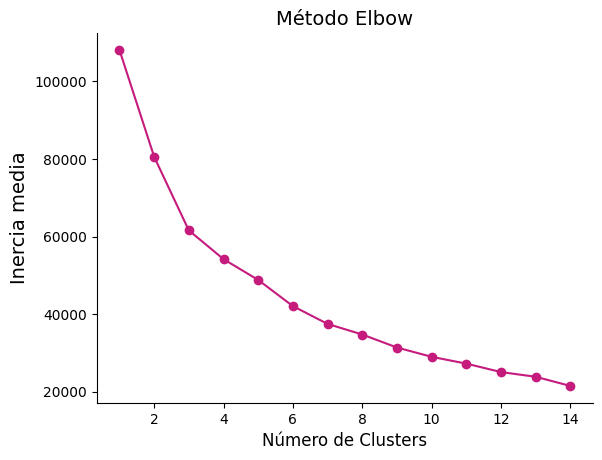

In [ ]:
plt.plot(range(1, 15), wcss, c="#c51b7d", marker='o')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Método Elbow', size=14)
plt.xlabel('Número de Clusters', size=12)
plt.ylabel('Inercia media', size=14)
plt.show()

A medida que aumenta k, la inercia disminuye (porque los puntos estarán más cerca de sus centroides) y se hace menos significativa después de cierto punto. El "codo" es el punto donde la reducción en inercia comienza a ser menos pronunciada. En nuestro caso no resulta tan clara la elección del k en función de este método. Si bien se podría establecer algún valor de k entre 6 y 10 como el número de clusters a seleccionar.

## Silhouette
Mide qué tan similares son los puntos dentro de un mismo cluster en comparación con los puntos de otros clusters. El resultado es una puntuación de -1, 0 y 1 para cada punto.
* Silhouette cercano a 1: indica que el punto está bien agrupado dentro de su cluster y que está lejos de los puntos de otros clusters.
* Silhouette cercano a 0: indica que el punto está en el borde de dos clusters y podría asignarse a cualquiera de ellos.
* Silhouette negativo: indica que el punto podría estar mal asignado a su cluster, es decir, se parece más a un punto de otro cluster.

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
for i, score in enumerate(sil):
    print(f"k = {i+2}: Silhouette Score = {score}")

k = 2: Silhouette Score = 0.297572681840265
k = 3: Silhouette Score = 0.3211281339174654
k = 4: Silhouette Score = 0.35721129058401524
k = 5: Silhouette Score = 0.3891182964885725
k = 6: Silhouette Score = 0.37507125309123646
k = 7: Silhouette Score = 0.3892385782777314
k = 8: Silhouette Score = 0.4119075975831907
k = 9: Silhouette Score = 0.42164122761579065
k = 10: Silhouette Score = 0.454260414711297
k = 11: Silhouette Score = 0.45949644533896217
k = 12: Silhouette Score = 0.4671420825733763
k = 13: Silhouette Score = 0.4796692960032871
k = 14: Silhouette Score = 0.5368990047136346
k = 15: Silhouette Score = 0.5378025200905276
k = 16: Silhouette Score = 0.5622162460088656
k = 17: Silhouette Score = 0.5636297092487874
k = 18: Silhouette Score = 0.5811256960169845
k = 19: Silhouette Score = 0.581554493646979
k = 20: Silhouette Score = 0.6113946182003236


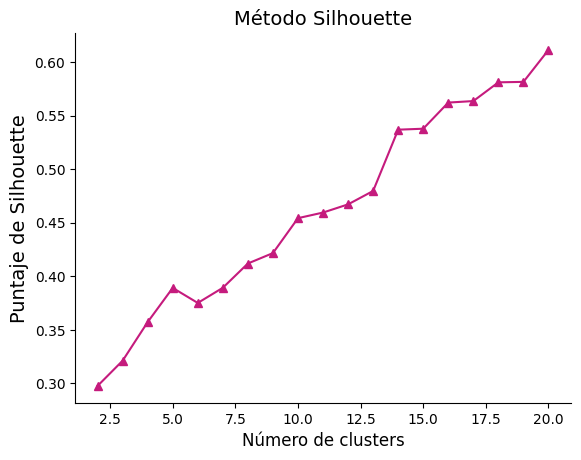

In [ ]:
plt.plot(range(2,21),sil, c="#c51b7d", marker='^')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Método Silhouette', size=14)
plt.xlabel('Número de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)

plt.show()

Con el método de Silhouette el valor óptimo del número de clusters es cuando el coeficiente de silueta promedio alcanza su valor máximo. En este caso, el mayor valor se obtendría con un k=20, veremos en detalle los grupos de clusters para ver si es correcta esta selección.

Para ello hacemos un análisis gráfico con los números de clusters que se corresponden con los picos del puntaje de silhouette.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

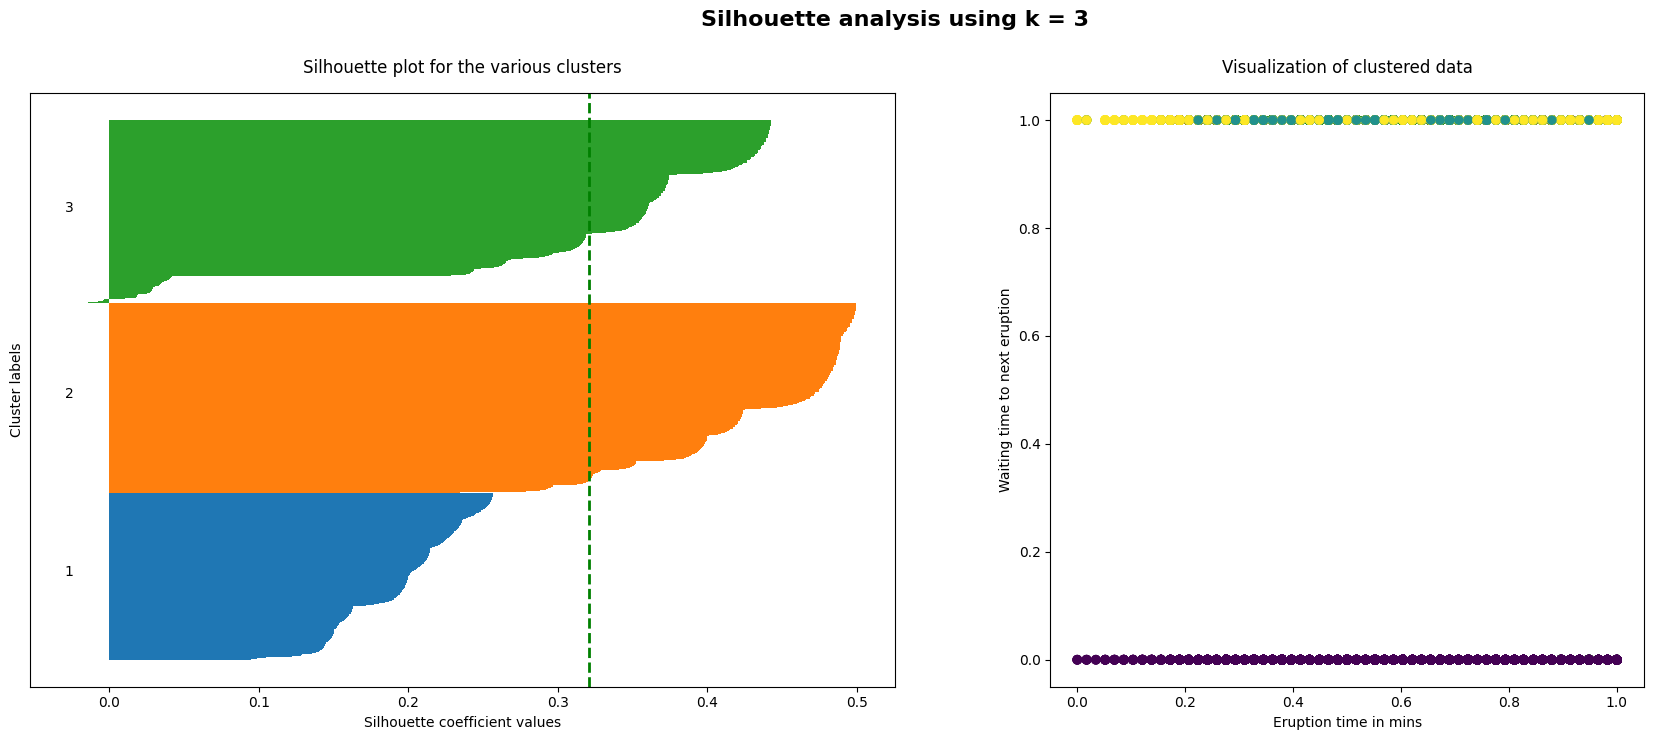

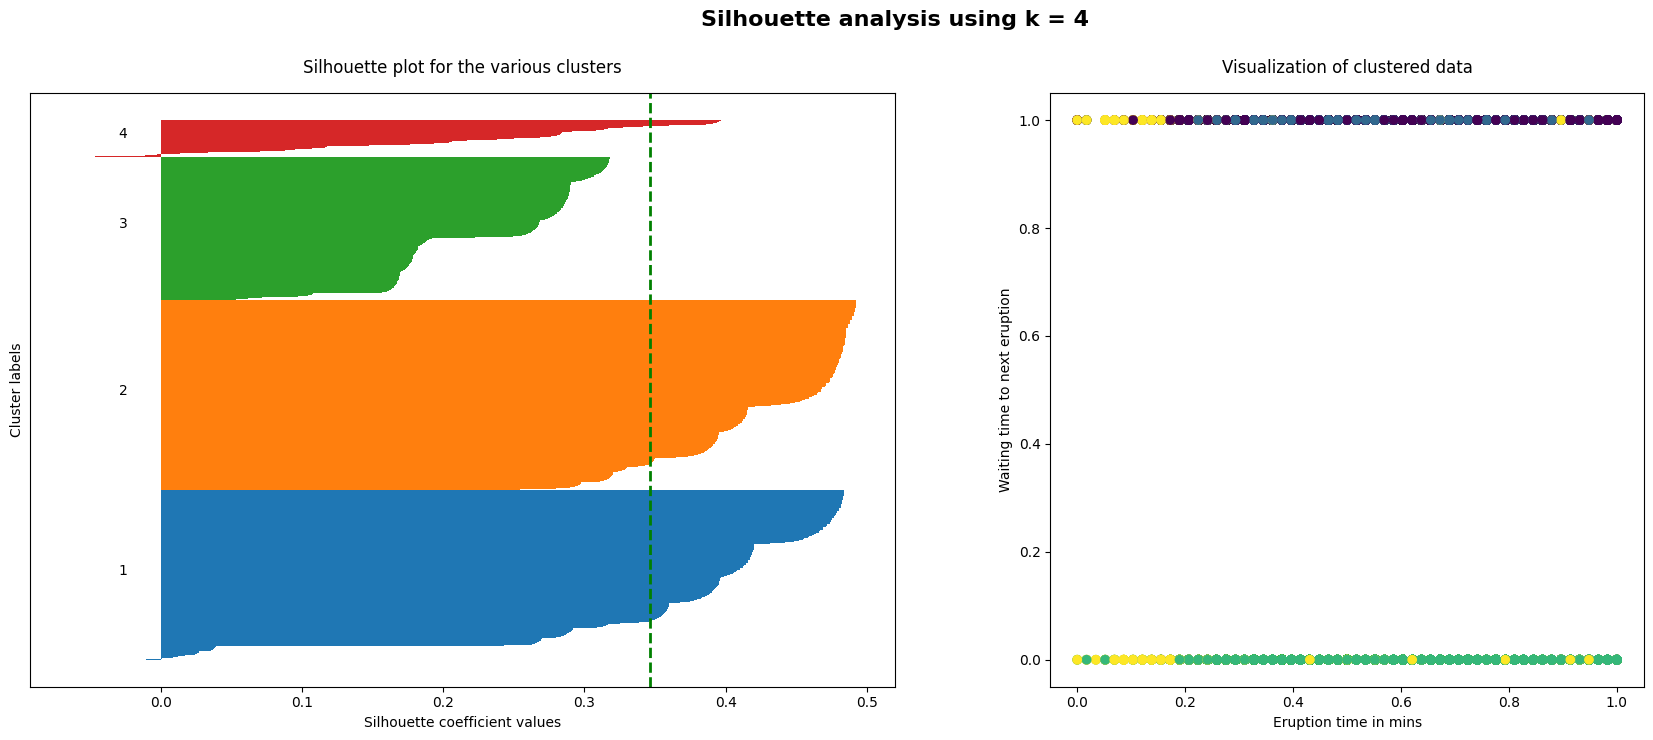

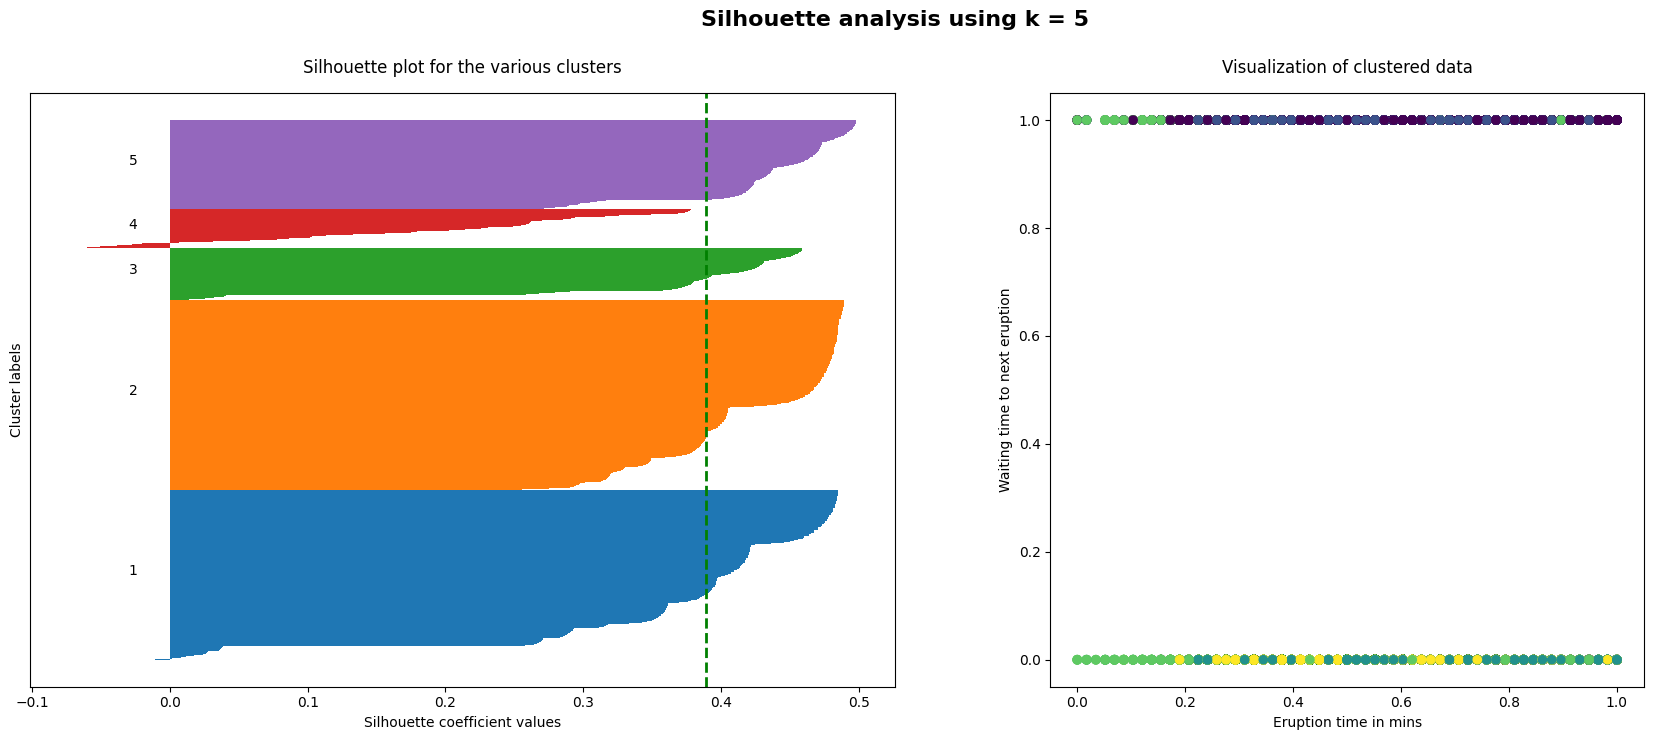

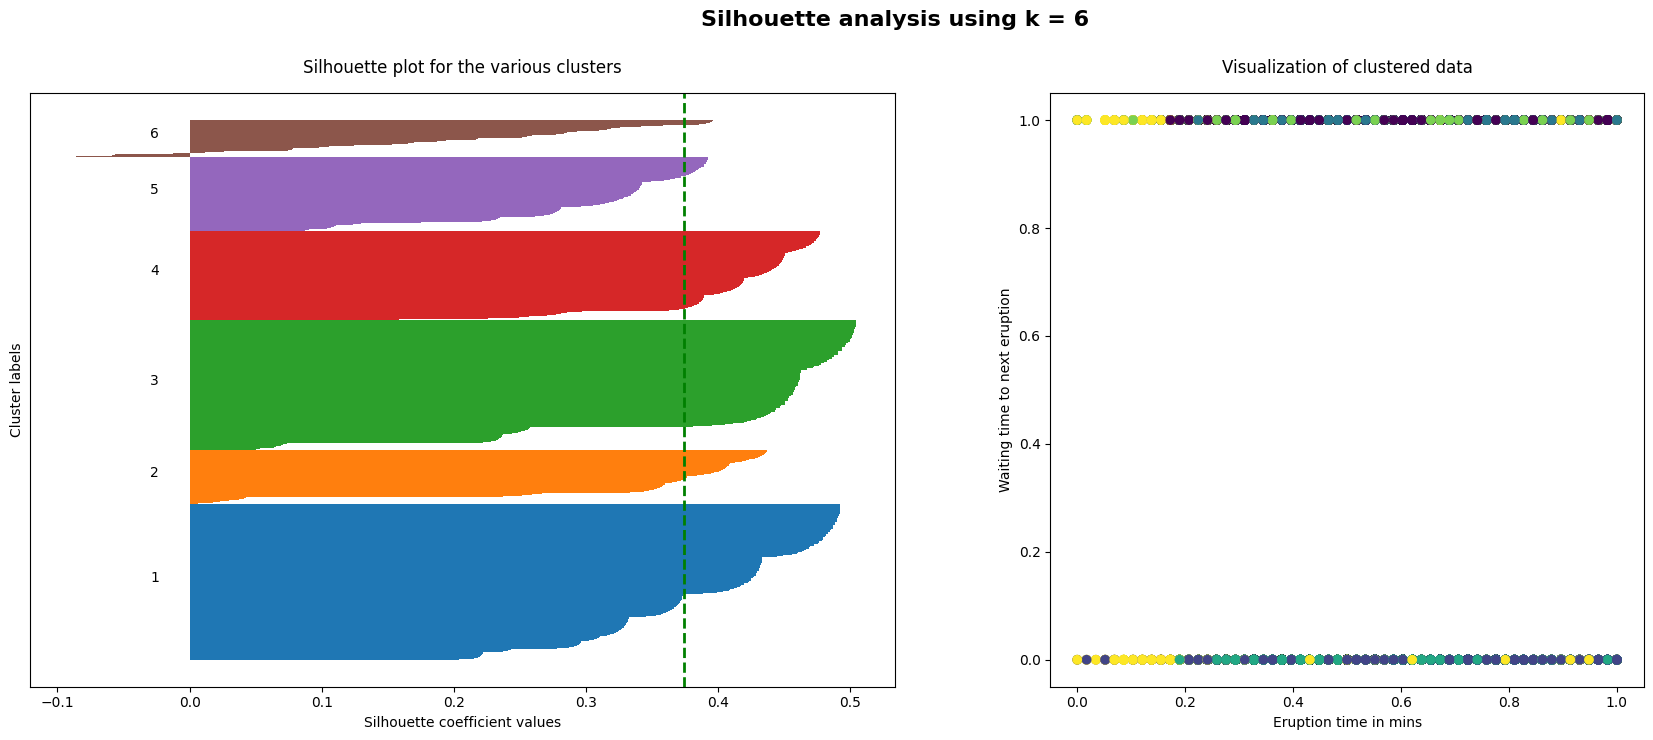

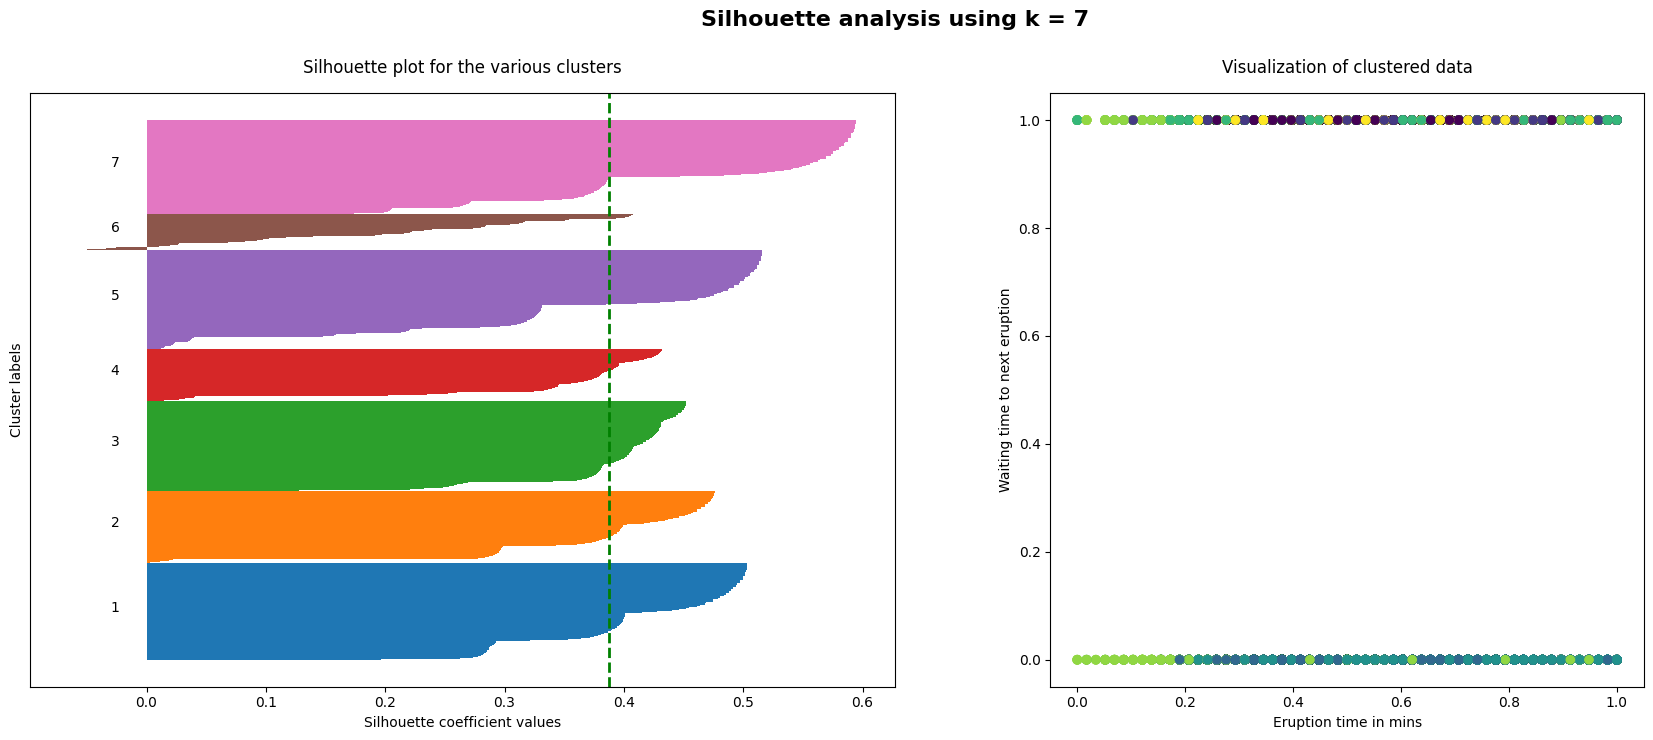

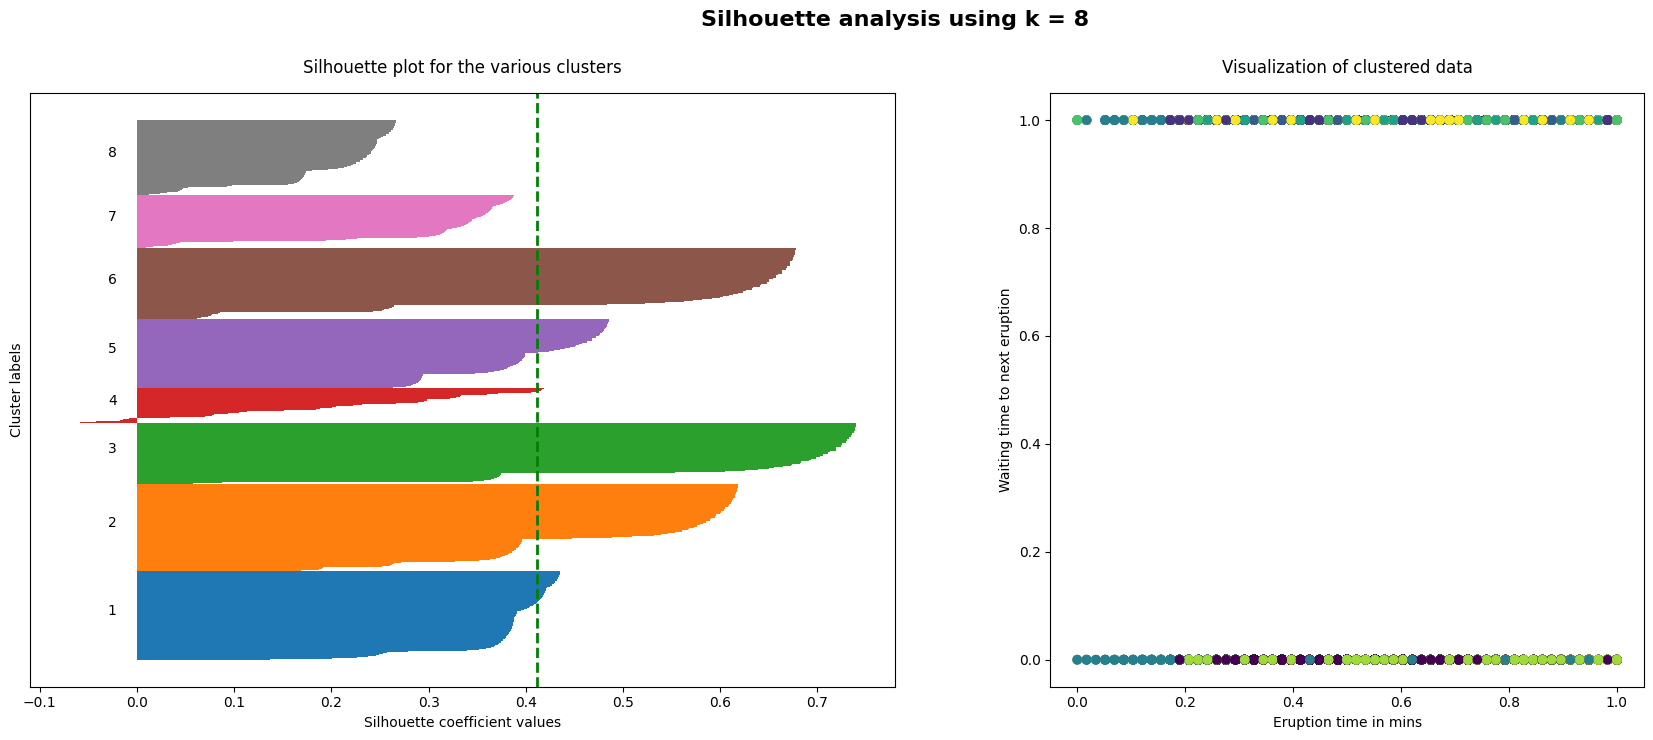

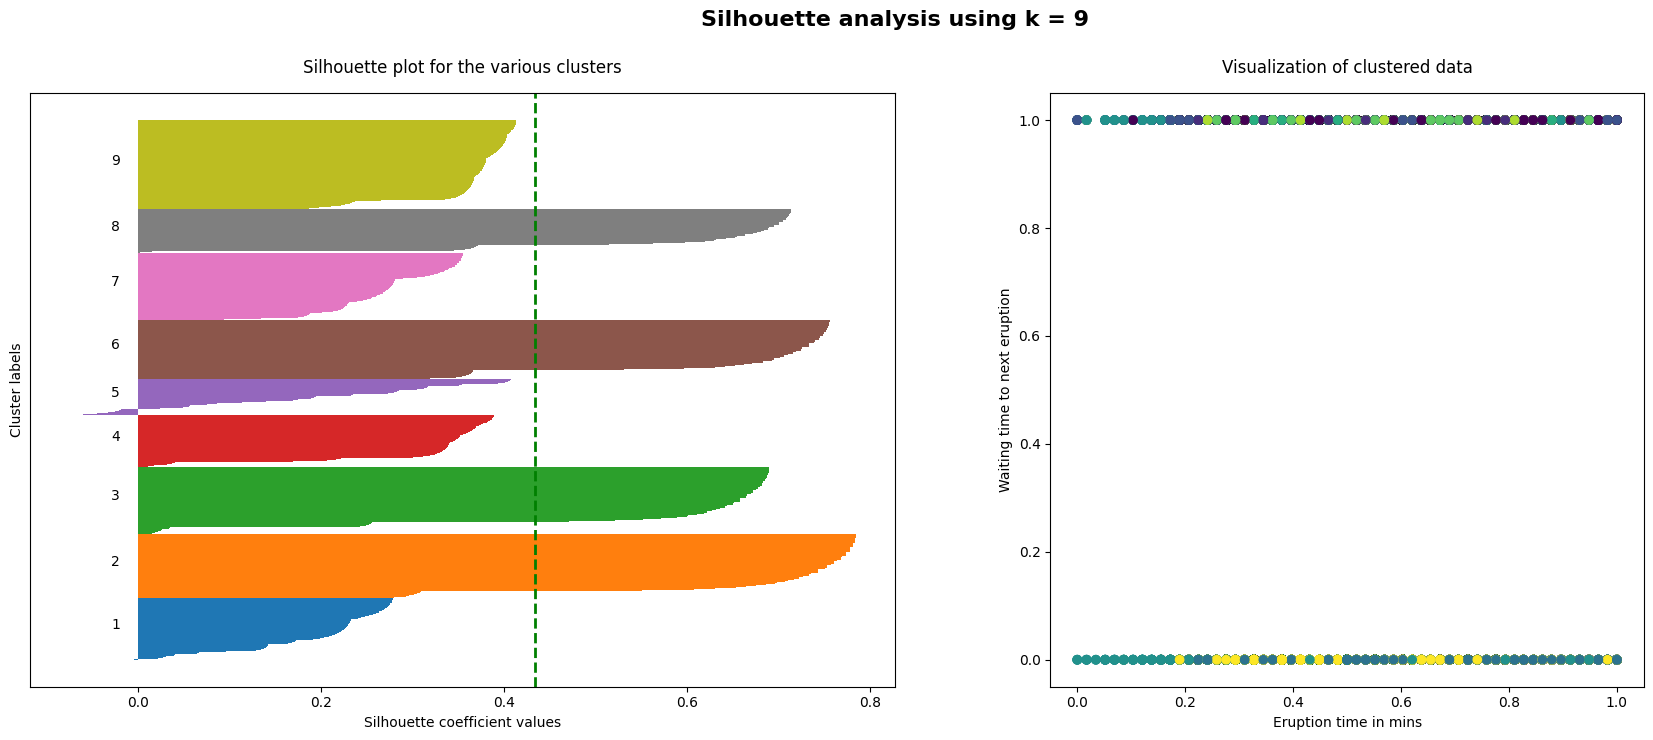

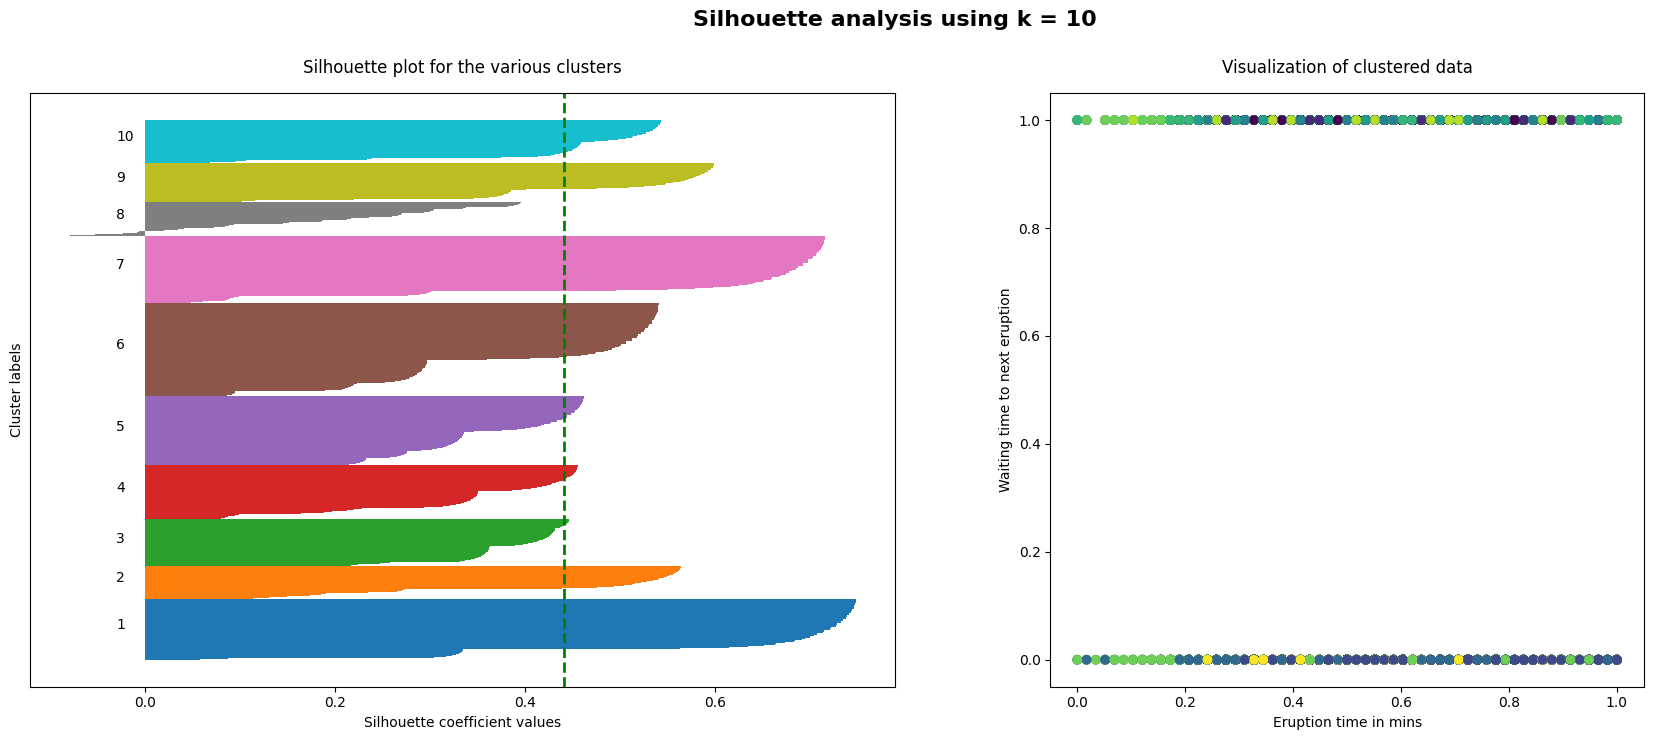

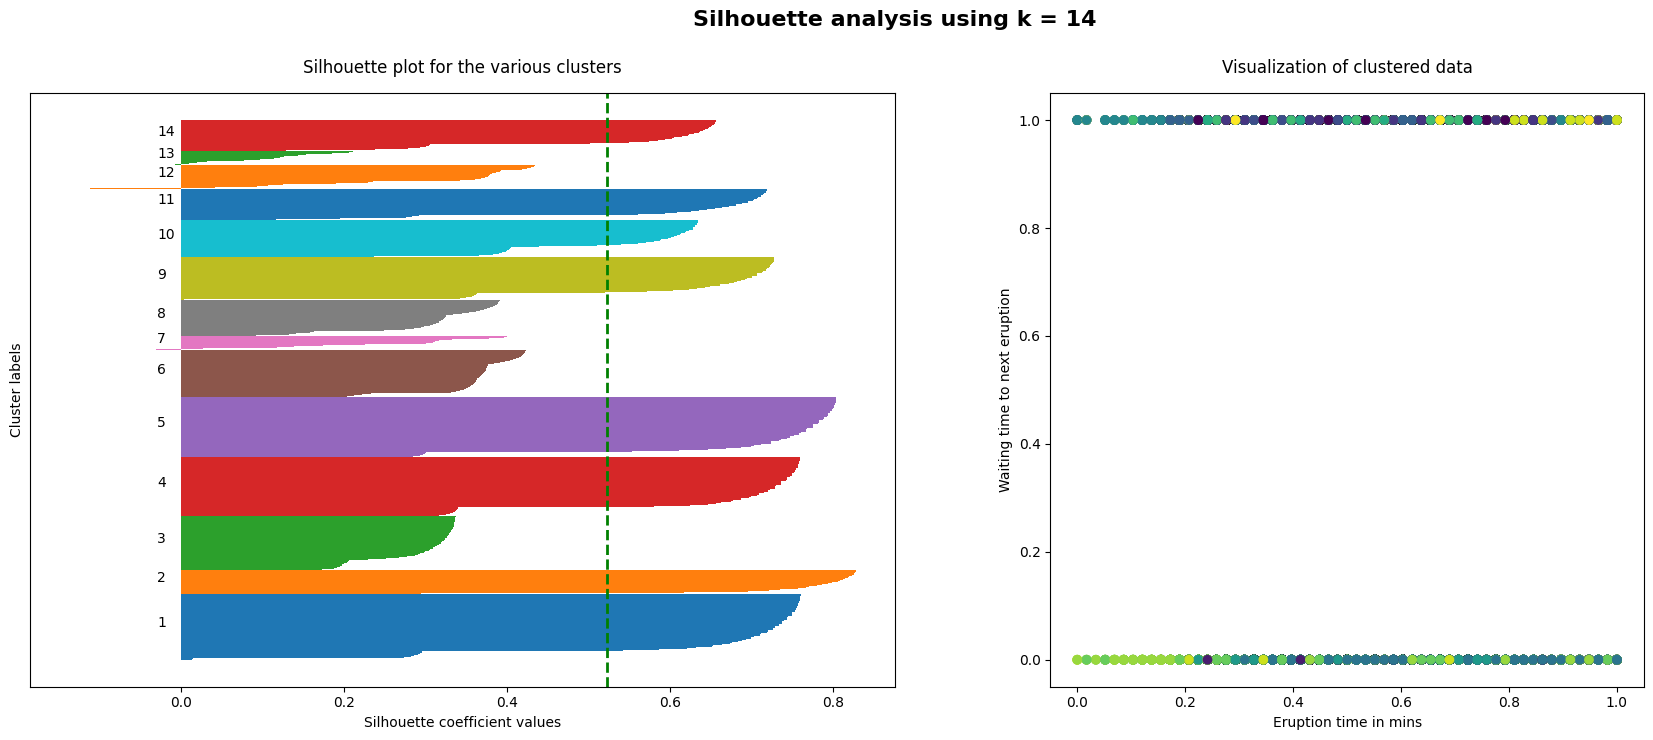

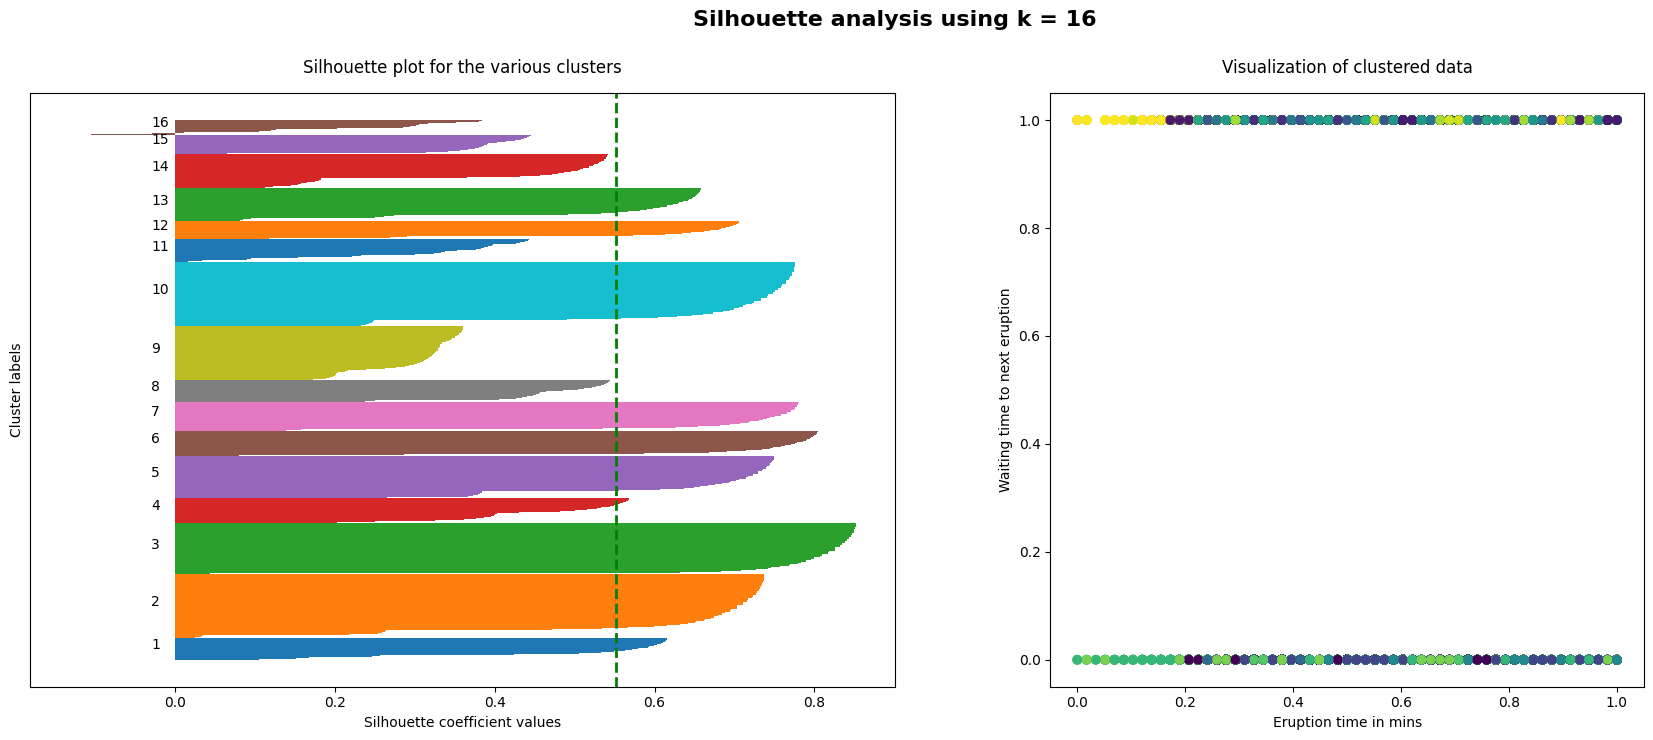

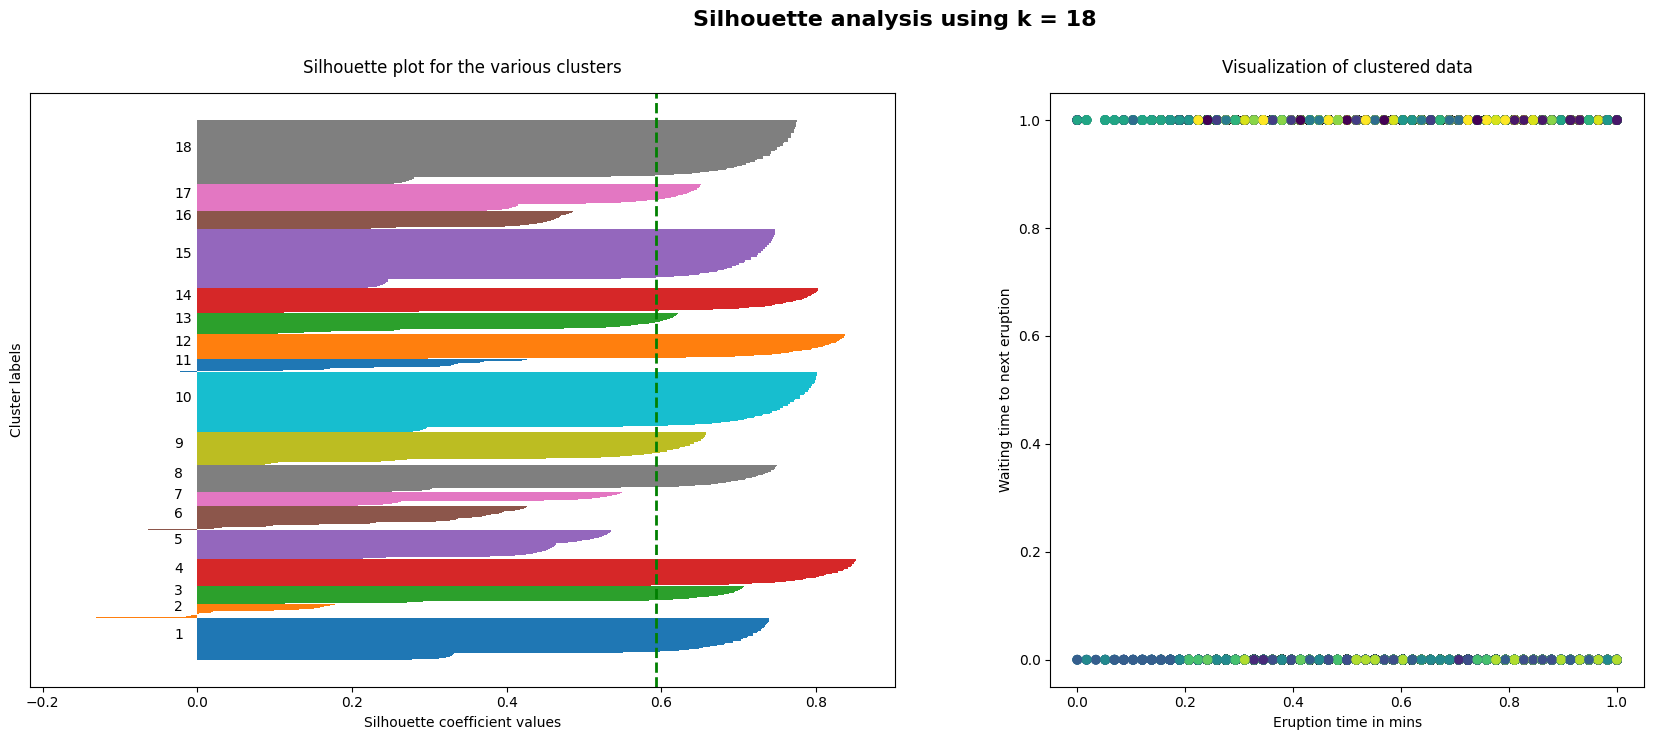

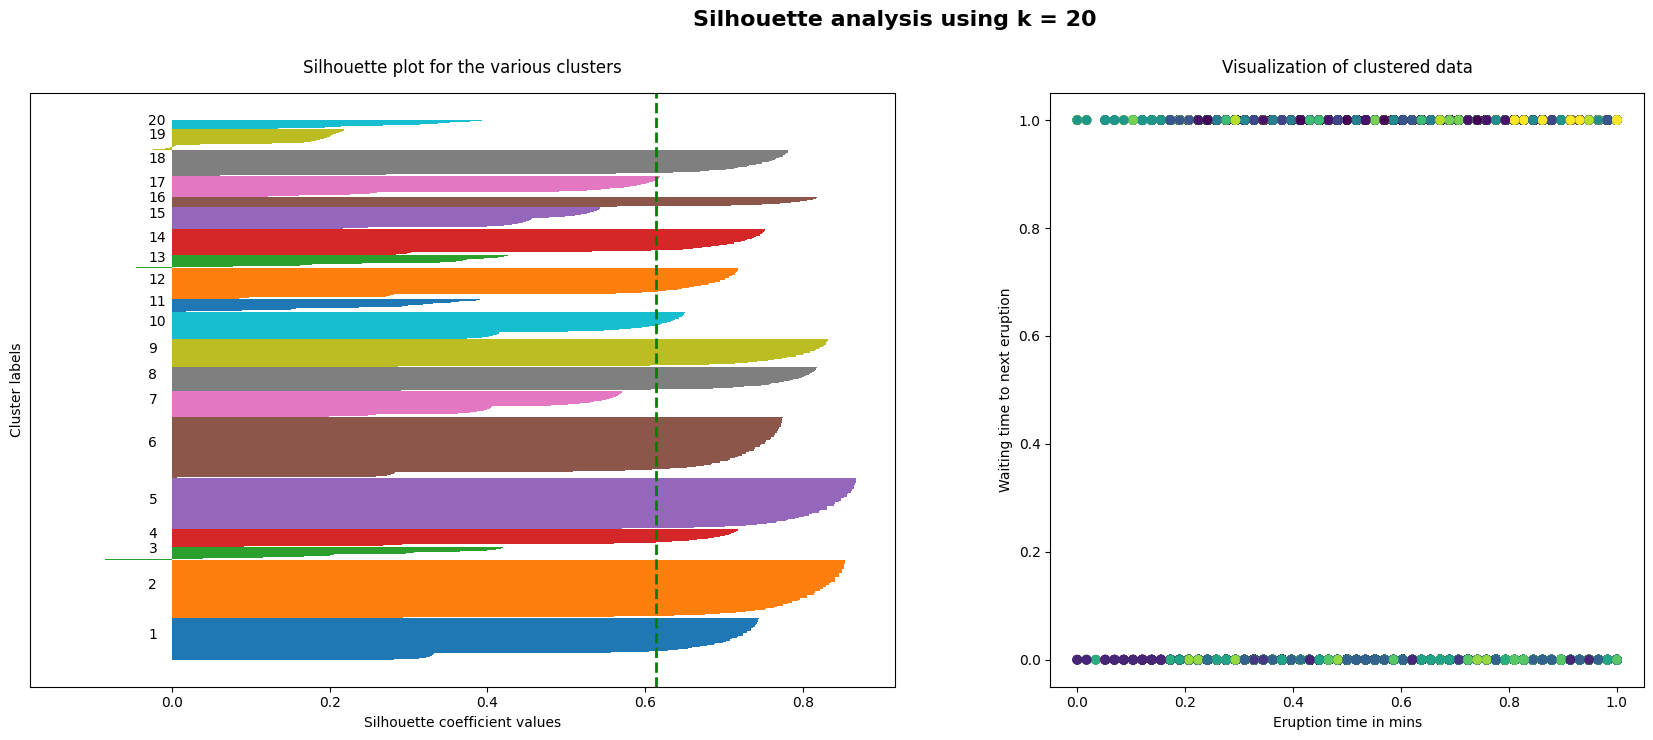

In [ ]:
X_std = X
silhouette_vals = silhouette_samples(X_std, labels)
avg_score = np.mean(silhouette_vals)

lista_k = [3, 4, 5, 6, 7, 8, 9, 10, 14, 16, 18, 20]


for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    kmS = KMeans(n_clusters=k)
    labels = kmS.fit_predict(X_std)
    centroids = kmS.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)


    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);


    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

En los gráficos analizados, se observa que en casi todos los casos, no todos los clusters alcanzan al valor promedio del silhouette score, algo que, junto con la distribución homogénea de valores entre clusters permitiría seleccionar el k mas apropiado. Se observa que con k = 6 y k = 7 se cumple este primer requisito, por lo cual avanzaremos con dichos valores, que coinciden con lo obtenido en el método del codo.  

# K- means

## K=6

En función de los análisis previos se utilizará un k=6 para el método K-means.

In [65]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
labels

array([3, 4, 1, ..., 0, 0, 4], dtype=int32)

In [67]:
df_final['cluster'] = labels

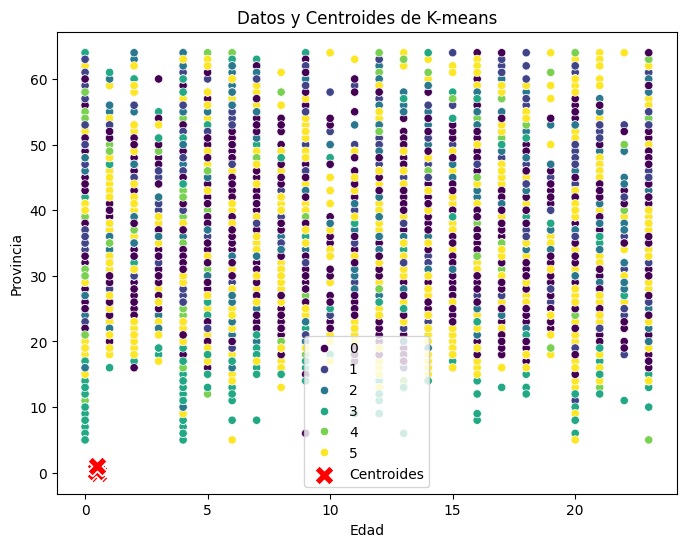

In [68]:
plt.figure(figsize=(8, 6))
#elijo edad y violencia fisica para graficar
sns.scatterplot(x=df_final['prov_persona_en_situacion_violencia'], y=df_final['edad_persona_en_situacion_de_violencia'], hue=labels, palette='viridis', marker='o')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means')
plt.xlabel('Edad')
plt.ylabel('Provincia')
plt.legend()
plt.show()

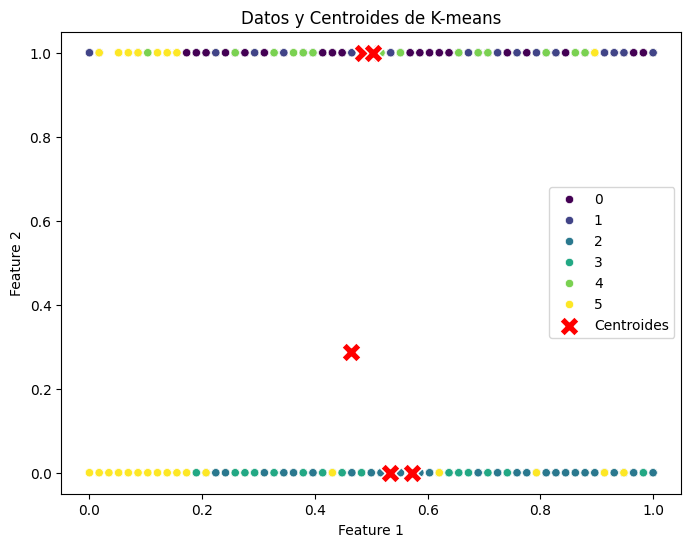

In [ ]:
plt.figure(figsize=(8, 6))
#elijo edad y violencia fisica para graficar
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', marker='o')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
valores_unicos, conteos = np.unique(y_means, return_counts=True)
for valor, conteo in zip(valores_unicos, conteos):
    print(f'Cluster: {valor}, Cantidad de datos: {conteo}')

Cluster: 0, Cantidad de datos: 22194
Cluster: 1, Cantidad de datos: 6110
Cluster: 2, Cantidad de datos: 10420
Cluster: 3, Cantidad de datos: 4264
Cluster: 4, Cantidad de datos: 7237
Cluster: 5, Cantidad de datos: 12920


Se observa que los datos se dividieron de manera aproximadamente equitativa entre los clusters 1, 3 y 4, mientras que en los clusters 2 y 5 se dividieron casi por la mitad y en el cero se concentraron una mayor cantidad de datos.

A partir de los agrupamientos obtenidos se analizarán las características particulares de cada cluster.

In [ ]:
df_normalizado['cluster'] = kmeans.labels_
pd.set_option('display.max_columns', None)
df_normalizado.groupby('cluster').describe()

edad_persona_en_situacion_de_violencia                                \
                                         count      mean       std       min   
cluster                                                                        
0                                      18186.0  0.499596  0.176588  0.017241   
1                                      12386.0  0.485021  0.179832  0.000000   
2                                       6065.0  0.572601  0.192728  0.017241   
3                                      10392.0  0.533248  0.170236  0.086207   
4                                      11693.0  0.502297  0.163266  0.086207   
5                                       4225.0  0.463913  0.222118  0.000000   

                                           tipo_de_violencia_fisica            \
              25%       50%       75%  max                    count      mean   
cluster                                                                         
0        0.362069  0.465517  0.620690  1.0                  18186.0  1.000000   
1        0.344828  0.448276  0.603448  1.0                  12386.0  1.000000   
2        0.431034  0.568966  0.706897  1.0                   6065.0  0.000000   
3        0.396552  0.517241  0.637931  1.0                  10392.0  0.000000   
4        0.379310  0.482759  0.603448  1.0                  11693.0  1.000000   
5        0.275862  0.431034  0.620690  1.0                   4225.0  0.288521   

                                           tipo_de_violencia_psicologica  \
              std  min  25%  50%  75%  max                         count   
cluster                                                                    
0        0.000000  1.0  1.0  1.0  1.0  1.0                       18186.0   
1        0.000000  1.0  1.0  1.0  1.0  1.0                       12386.0   
2        0.000000  0.0  0.0  0.0  0.0  0.0                        6065.0   
3        0.000000  0.0  0.0  0.0  0.0  0.0                       10392.0   
4        0.000000  1.0  1.0  1.0  1.0  1.0                       11693.0   
5        0.453128  0.0  0.0  0.0  1.0  1.0                        4225.0   

                                                     tipo_de_violencia_sexual  \
             mean       std  min  25%  50%  75%  max                    count   
cluster                                                                         
0        1.000000  0.000000  1.0  1.0  1.0  1.0  1.0                  18186.0   
1        1.000000  0.000000  1.0  1.0  1.0  1.0  1.0                  12386.0   
2        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0                   6065.0   
3        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0                  10392.0   
4        1.000000  0.000000  1.0  1.0  1.0  1.0  1.0                  11693.0   
5        0.288521  0.453128  0.0  0.0  0.0  1.0  1.0                   4225.0   

                                                      \
             mean       std  min  25%  50%  75%  max   
cluster                                                
0        0.132739  0.339302  0.0  0.0  0.0  0.0  1.0   
1        0.123688  0.329239  0.0  0.0  0.0  0.0  1.0   
2        0.060511  0.238451  0.0  0.0  0.0  0.0  1.0   
3        0.063703  0.244235  0.0  0.0  0.0  0.0  1.0   
4        0.191311  0.393350  0.0  0.0  0.0  0.0  1.0   
5        0.564260  0.495912  0.0  0.0  1.0  1.0  1.0   

        tipo_de_violencia_economica_y_patrimonial                           \
                                            count      mean       std  min   
cluster                                                                      
0                                         18186.0  0.442538  0.496701  0.0   
1                                         12386.0  0.000000  0.000000  0.0   
2                                          6065.0  0.445837  0.497099  0.0   
3                                         10392.0  0.453233  0.497832  0.0   
4                                         11693.0  1.000000  0.000000  1.0   
5            

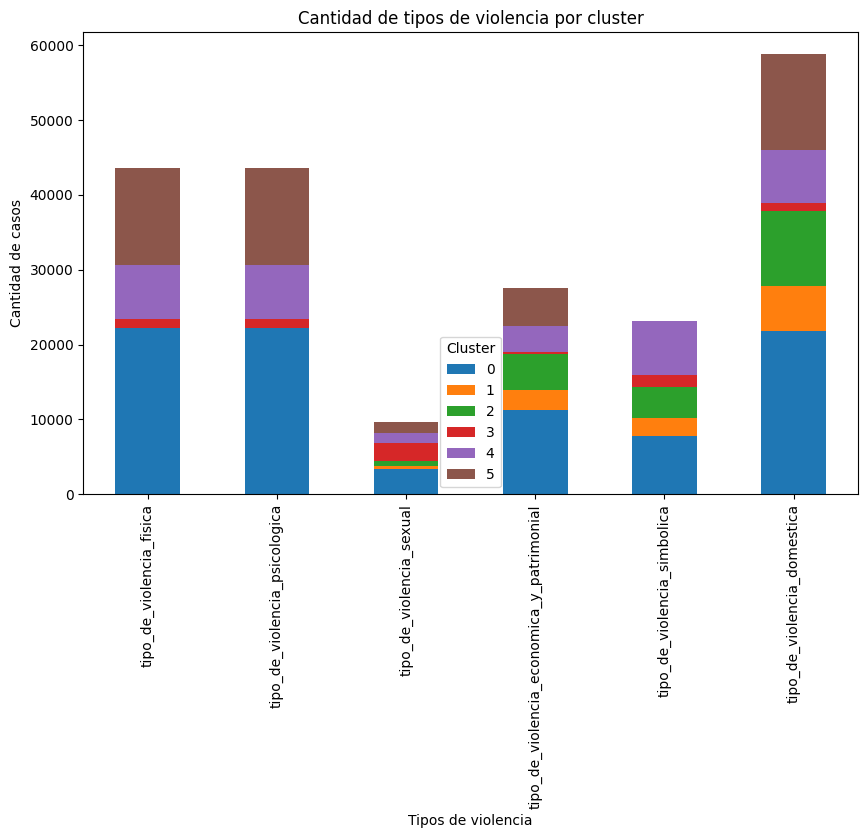

In [ ]:
columnas_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica'
]
cant_violencia = df_final.groupby('cluster')[columnas_violencia].sum()
cant_violencia = cant_violencia.T
cant_violencia.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Cantidad de tipos de violencia por cluster')
plt.xlabel('Tipos de violencia')
plt.ylabel('Cantidad de casos')
plt.legend(title='Cluster')
plt.show()

Porcentaje de tipos de violencia positiva en cada cluster

In [79]:
columnas_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica'
]
suma_violencia = df_final.groupby('cluster')[columnas_violencia].sum()
total_casos = df_final[columnas_violencia].sum()
porcentaje_violencia = suma_violencia.div(total_casos, axis=1) * 100
porcentaje_violencia

,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica
cluster,,,,,,
0,50.909508,50.909508,35.433562,40.869123,33.754708,37.180818
1,0.000000,0.000000,3.826159,9.883003,10.454998,10.142388
2,0.000000,0.000000,6.893325,17.142650,17.996450,16.974295
3,2.853538,2.853538,25.046787,1.122738,6.463483,1.878094
4,16.600528,16.600528,14.254523,12.495458,31.330361,12.120851
5,29.636426,29.636426,14.545644,18.487029,0.000000,21.703554


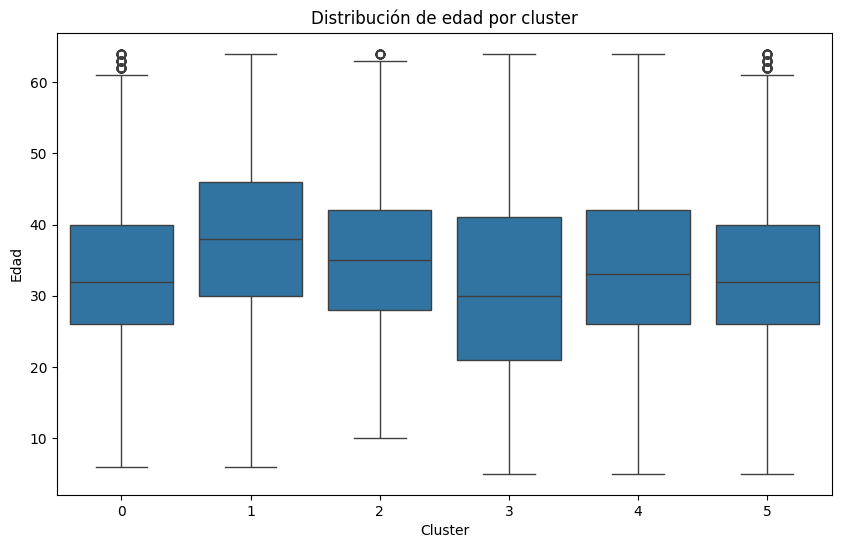

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='edad_persona_en_situacion_de_violencia', data=df_final)

plt.title('Distribución de edad por cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

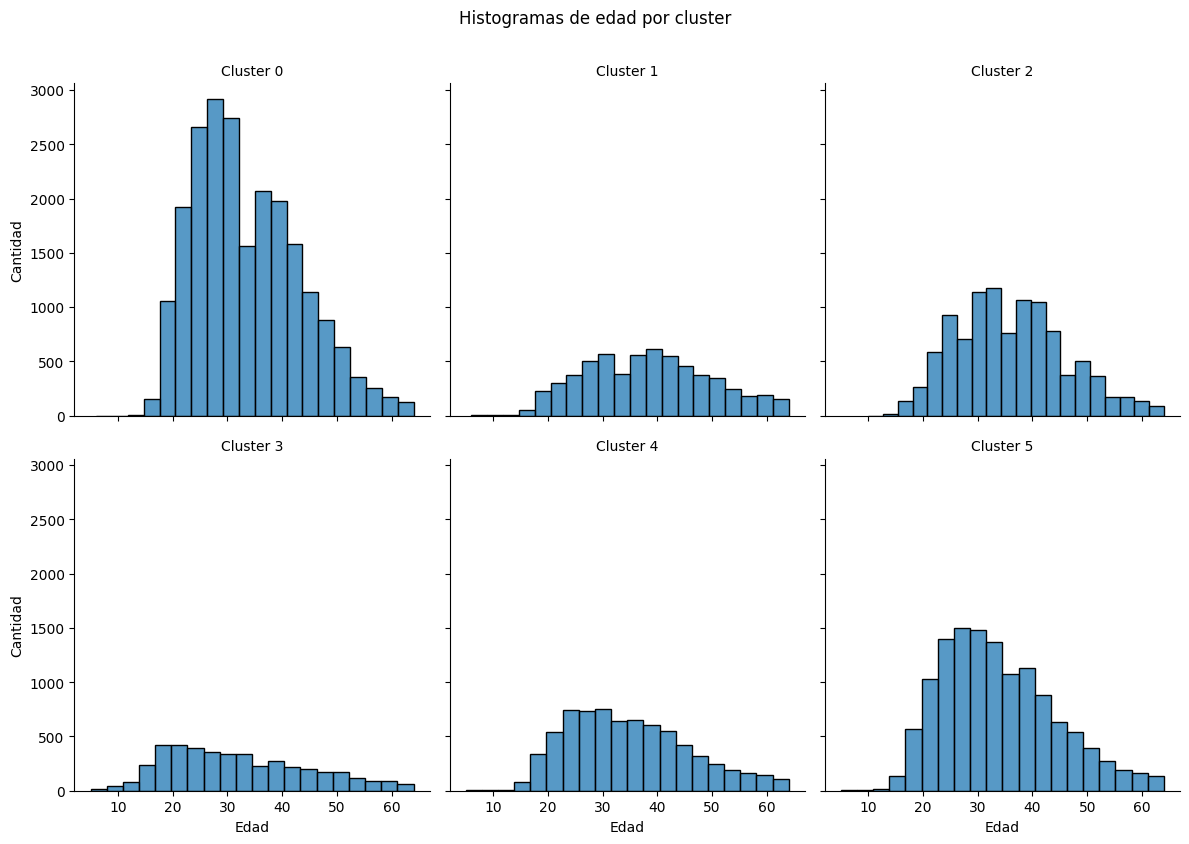

In [ ]:
g = sns.FacetGrid(df_final, col='cluster', col_wrap=3, height=4)
g.map(sns.histplot, 'edad_persona_en_situacion_de_violencia', bins=20)
g.set_axis_labels('Edad', 'Cantidad')
g.set_titles('Cluster {col_name}')
g.fig.suptitle('Histogramas de edad por cluster', y=1.05)
plt.show()

## K=7

 k=7 para el método K-means.

In [81]:
X2 = df_normalizado.values

In [82]:
kmeans2 = KMeans(n_clusters=7, random_state=0)

kmeans2.fit(X2)

y_means2 = kmeans2.fit_predict(X2)

centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


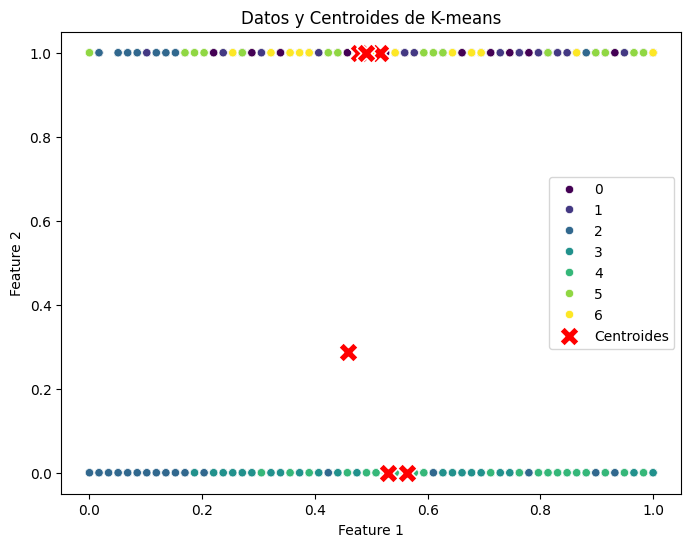

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=labels2, palette='viridis', marker='o')
sns.scatterplot(x=centroids2[:, 0], y=centroids2[:, 1], color='red', marker='X', s=200, label='Centroides')
plt.title('Datos y Centroides de K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [84]:
valores_unicos2, conteos2 = np.unique(y_means2, return_counts=True)
for valor, conteo in zip(valores_unicos2, conteos2):
    print(f'Cluster: {valor}, Cantidad de datos: {conteo}')

Cluster: 0, Cantidad de datos: 10946
Cluster: 1, Cantidad de datos: 8546
Cluster: 2, Cantidad de datos: 4249
Cluster: 3, Cantidad de datos: 11033
Cluster: 4, Cantidad de datos: 5493
Cluster: 5, Cantidad de datos: 11630
Cluster: 6, Cantidad de datos: 11248


Se observa que los datos se dividieron de manera aproximadamente equitativa entre los clusters 0, 1, 2 y 4, y similar entre los clusters 3, 5 y 6.

A partir de los agrupamientos obtenidos se analizarán las características particulares de cada cluster.

In [85]:
df_normalizado['cluster2'] = kmeans2.labels_
pd.set_option('display.max_columns', None)
df_normalizado.groupby('cluster2').describe()

edad_persona_en_situacion_de_violencia                                \
                                          count      mean       std       min   
cluster2                                                                        
0                                       10946.0  0.477949  0.168741  0.016949   
1                                        8546.0  0.515402  0.178553  0.016949   
2                                        4249.0  0.458800  0.221047  0.000000   
3                                       11033.0  0.528949  0.175189  0.016949   
4                                        5493.0  0.563633  0.184388  0.101695   
5                                       11630.0  0.477609  0.184966  0.000000   
6                                       11248.0  0.491223  0.156393  0.169492   

                                            tipo_de_violencia_fisica  \
               25%       50%       75%  max                    count   
cluster2                                                               
0         0.355932  0.440678  0.593220  1.0                  10946.0   
1         0.372881  0.491525  0.627119  1.0                   8546.0   
2         0.271186  0.423729  0.610169  1.0                   4249.0   
3         0.389831  0.508475  0.644068  1.0                  11033.0   
4         0.423729  0.559322  0.694915  1.0                   5493.0   
5         0.338983  0.440678  0.593220  1.0                  11630.0   
6         0.372881  0.474576  0.593220  1.0                  11248.0   

                                                       \
              mean       std  min  25%  50%  75%  max   
cluster2                                                
0         1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
1         1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
2         0.288303  0.453026  0.0  0.0  0.0  1.0  1.0   
3         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
5         1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
6         1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   

         tipo_de_violencia_psicologica                                     \
                                 count      mean       std  min  25%  50%   
cluster2                                                                    
0                              10946.0  1.000000  0.000000  1.0  1.0  1.0   
1                               8546.0  1.000000  0.000000  1.0  1.0  1.0   
2                               4249.0  0.288303  0.453026  0.0  0.0  0.0   
3                              11033.0  0.000000  0.000000  0.0  0.0  0.0   
4                               5493.0  0.000000  0.000000  0.0  0.0  0.0   
5                              11630.0  1.000000  0.000000  1.0  1.0  1.0   
6                              11248.0  1.000000  0.000000  1.0  1.0  1.0   

                   tipo_de_violencia_sexual                                \
          75%  max                    count      mean       std  min  25%   
cluster2                                                                    
0         1.0  1.0                  10946.0  0.115019  0.319060  0.0  0.0   
1         1.0  1.0                   8546.0  0.192137  0.394003  0.0  0.0   
2         1.0  1.0                   4249.0  0.562485  0.496139  0.0  0.0   
3         0.0  0.0                  11033.0  0.060999  0.239339  0.0  0.0   
4         0.0  0.0                   5493.0  0.065174  0.246855  0.0  0.0   
5         1.0  1.0                  11630.0  0.098624  0.298170  0.0  0.0   
6         1.0  1.0                  11248.0  0.191056  0.393151  0.0  0.0   

                        tipo_de_violencia_economica_y_patrimonial            \
          50%  75%  max                                     count      mean   
cluster2                                                                      
0         0.0  0.0  1.0                                   10946.0  0.000000   
1         0.0  0.0  1.0                         

In [86]:
df_final['cluster2'] = labels2

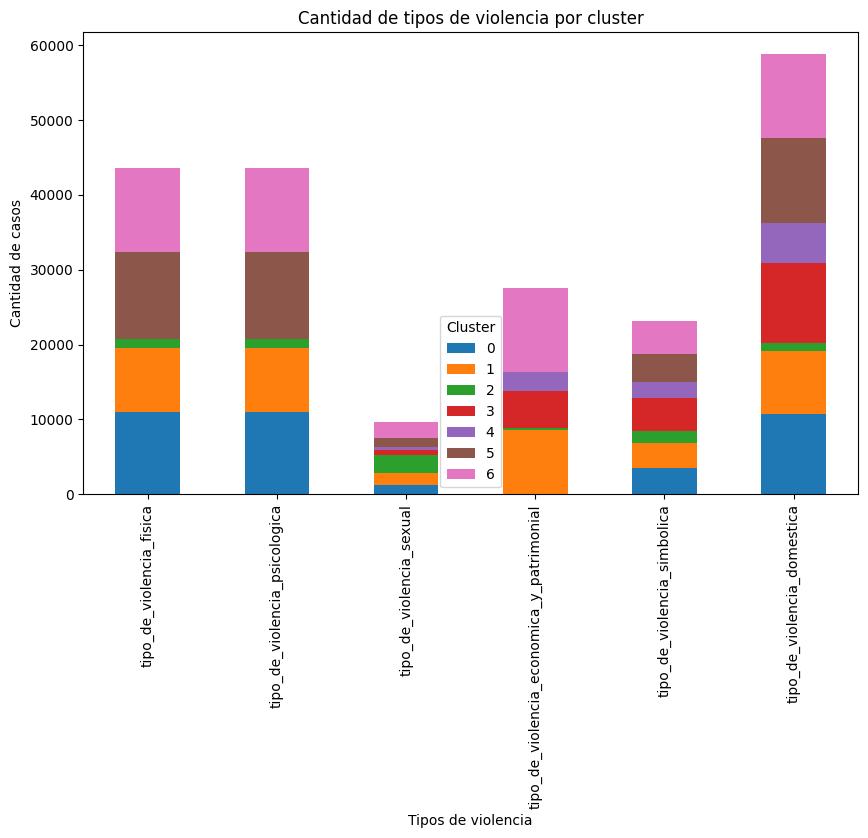

In [87]:
columnas_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica'
]
cant_violencia = df_final.groupby('cluster2')[columnas_violencia].sum()
cant_violencia = cant_violencia.T
cant_violencia.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Cantidad de tipos de violencia por cluster')
plt.xlabel('Tipos de violencia')
plt.ylabel('Cantidad de casos')
plt.legend(title='Cluster')
plt.show()

Porcentaje de tipos de violencia positiva en cada cluster

In [88]:
columnas_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica'
]
suma_violencia2 = df_final.groupby('cluster2')[columnas_violencia].sum()
total_casos2 = df_final[columnas_violencia].sum()
porcentaje_violencia2 = suma_violencia2.div(total_casos2, axis=1) * 100
porcentaje_violencia2

,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica
cluster2,,,,,,
0,25.108384,25.108384,13.090040,0.000000,15.004979,18.224657
1,19.603166,19.603166,17.072156,31.051522,14.888090,14.386813
2,2.809955,2.809955,24.849241,1.068236,6.463483,1.859381
3,0.000000,0.000000,6.997297,17.840273,19.472704,17.974584
4,0.000000,0.000000,3.722188,9.170845,8.978744,9.142099
5,26.677371,26.677371,11.925556,0.000000,16.442270,19.456305
6,25.801124,25.801124,22.343523,40.869123,18.749729,18.956161


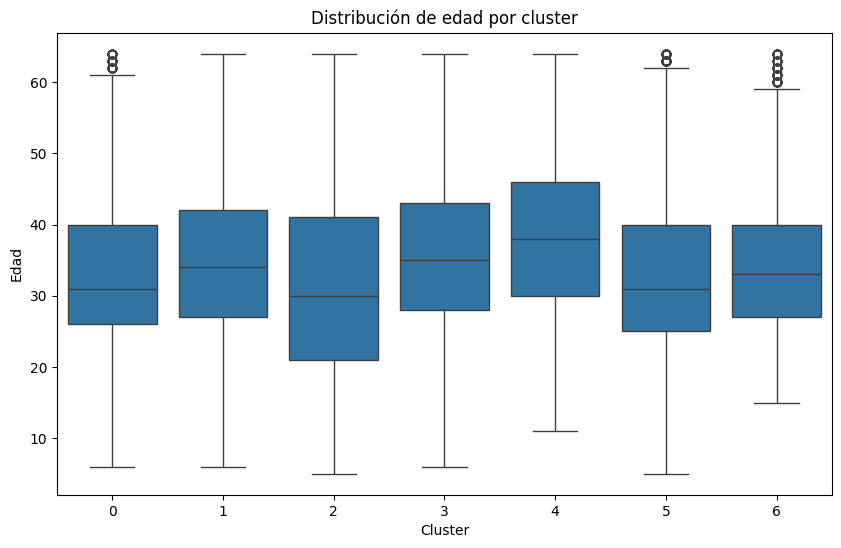

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster2', y='edad_persona_en_situacion_de_violencia', data=df_final)

plt.title('Distribución de edad por cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

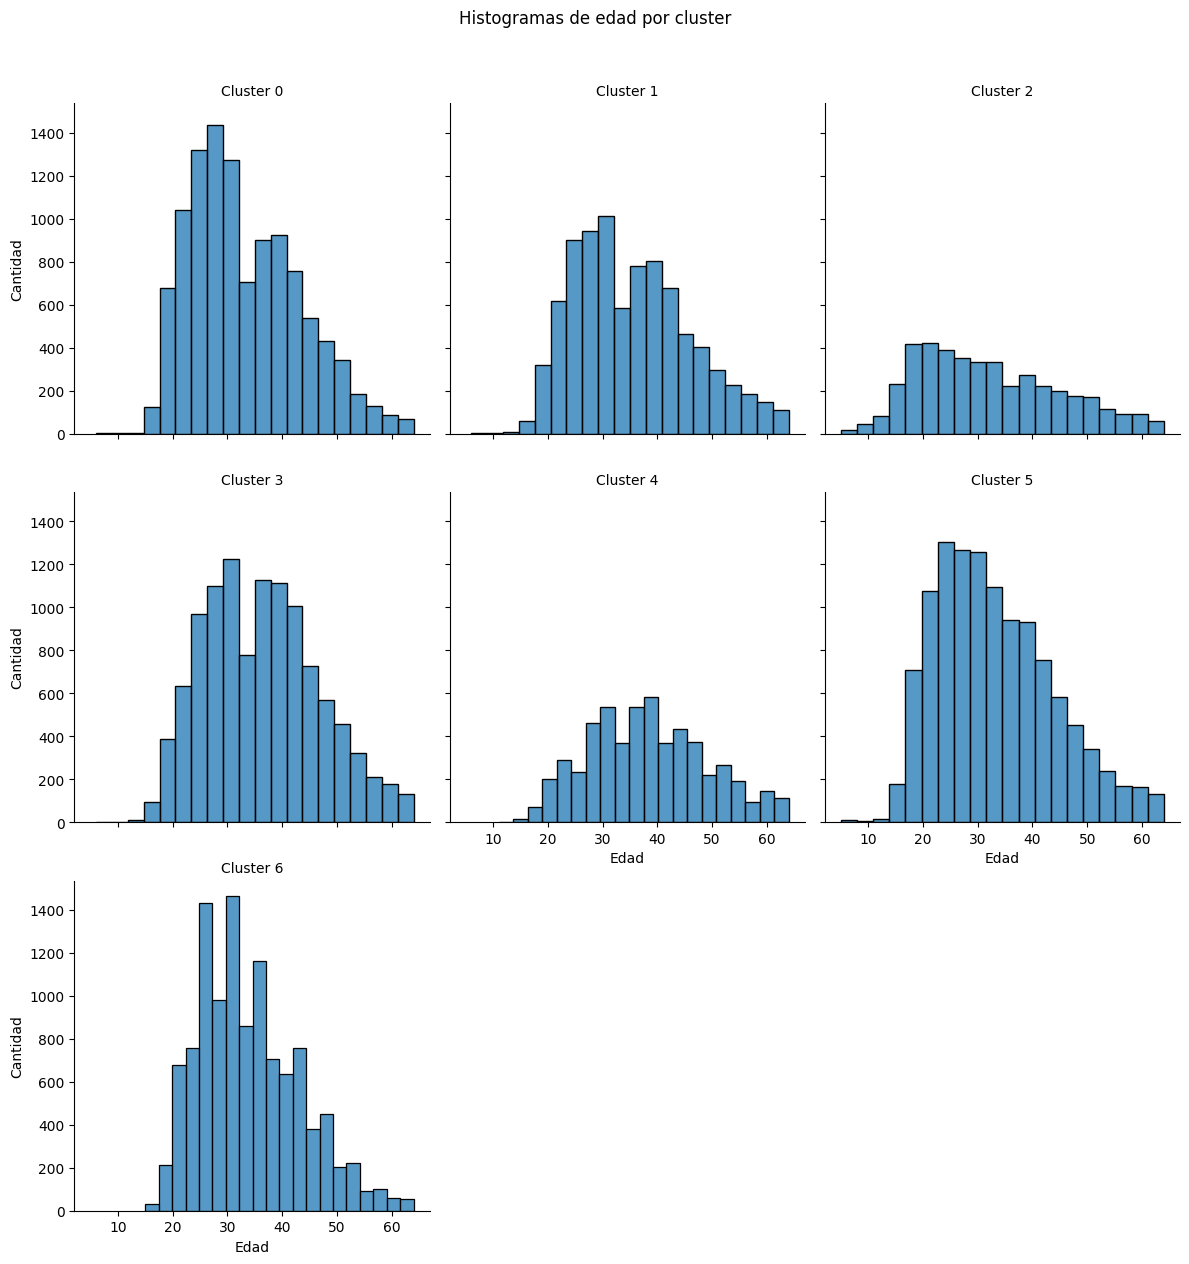

In [ ]:
g = sns.FacetGrid(df_final, col='cluster2', col_wrap=3, height=4)
g.map(sns.histplot, 'edad_persona_en_situacion_de_violencia', bins=20)
g.set_axis_labels('Edad', 'Cantidad')
g.set_titles('Cluster {col_name}')
g.fig.suptitle('Histogramas de edad por cluster', y=1.05)
plt.show()

# **DBSCAN**

Siendo epsilon el radio de la vecindad y min_samples el número mínimo de puntos para formar un cluster, probamos con los siguientes valores para dichos parámetros.

In [ ]:
Xd = df_normalizado.values
db = DBSCAN(eps=0.5, min_samples=10)
labels = db.fit_predict(Xd)

In [ ]:
labels_db = db.labels_

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

In [ ]:
print('Número estimado de clusters: %d' % n_clusters_db)
print('Número estimado de puntos de ruido: %d' % n_noise_db)

Número estimado de clusters: 123
Número estimado de puntos de ruido: 234


Estos valores nos brindan 123 cluster y 234 puntos de ruido. Que gráficamente se ve de la siguiente manera:

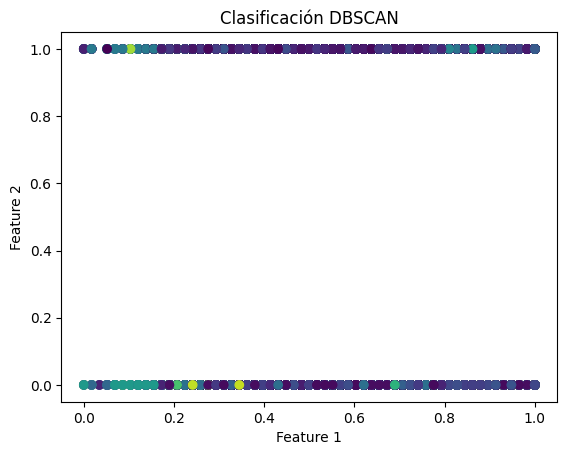

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(Xd[:, 0], Xd[:, 1], c=labels, cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación DBSCAN')  # Título del gráfico

plt.show()  # Muestra el gráfico

Intentaremos evaluar el mejor valor para epsilon mediante el Método del codo

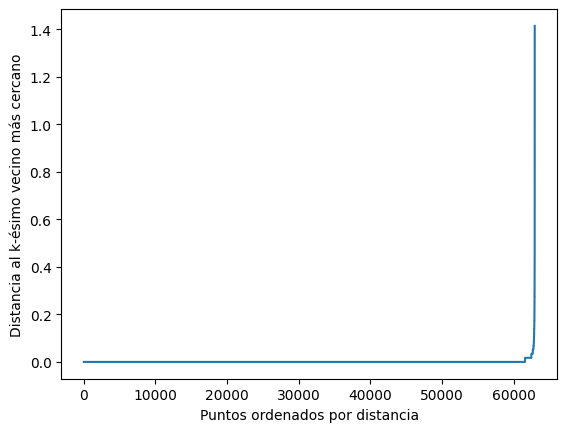

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calcula las distancias a los k vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=5)  # min_samples = 5
neigh.fit(Xd)
distances, indices = neigh.kneighbors(Xd)

# Ordena las distancias y grafica
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al k-ésimo vecino más cercano")
plt.show()

Dada la información del gráfico, probamos con un epsilon = 0.1

In [ ]:
Xd = df_normalizado.values
db = DBSCAN(eps=0.1, min_samples=10)
labels = db.fit_predict(Xd)

In [ ]:
labels_db = db.labels_

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

In [ ]:
print('Número estimado de clusters: %d' % n_clusters_db)
print('Número estimado de puntos de ruido: %d' % n_noise_db)

Número estimado de clusters: 97
Número estimado de puntos de ruido: 899


De esta forma obtenemos 97 clusters con 899 puntos de ruido.

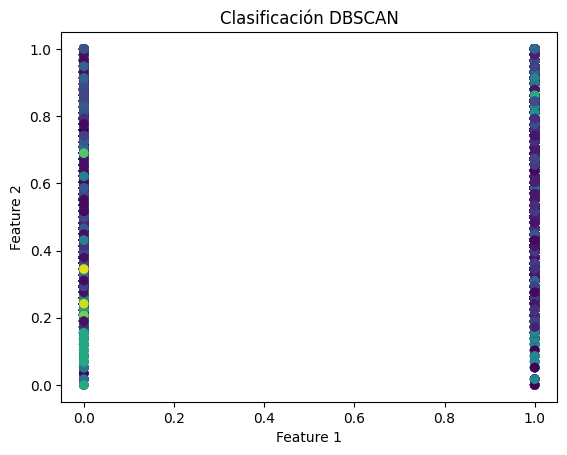

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(Xd[:, 1], Xd[:, 0], c=labels, cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación DBSCAN')  # Título del gráfico

plt.show()  # Muestra el gráfico

Con los datos que caracterizan el dataframe no se obtiene un gráfico con información significativa.

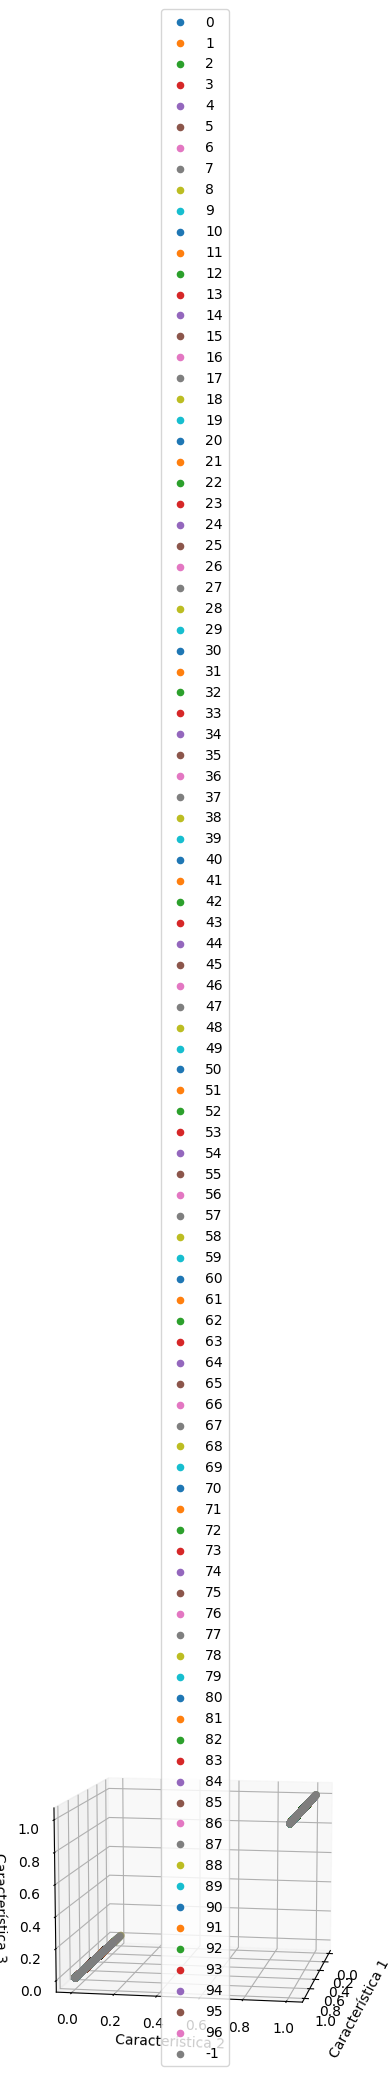

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = df_normalizado.iloc[:, :3].values

# Crea una figura y un subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos, coloreando según el cluster
unique_labels = set(labels_db)
for label in unique_labels:
    # Filtra los puntos de cada cluster
    cluster_points = X[labels_db == label]

    # Grafica los puntos del cluster
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=label)

# Configura los ejes y la leyenda
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.legend()
ax.view_init(elev=10, azim=10)
# Muestra la gráfica
plt.show()

En el análisis con DBSCAN obtuvimos una mayor cantidad de clusters. Una línea para continuar el análisis podría ser evaluar en este caso las características de dichos clusters.

# Conclusión y líneas a  seguir

Podríamos concluir que, en principio, el análisis por via de k-means nos ofrece una menor cantidad de clusters que pueden analizarse y evaluar los agrupamientos realizados, con las características propias de cada uno.

Se podrían graficar diversas opciones incorporando la variable provincias y edad sin normalizar para asignar características reales a cada cluster.